# Principal Component Analysis (PCA)
 Implementing PCA with numpy

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time



In [85]:
from tensorflow.keras.datasets.mnist import load_data

### Steps to implement PCA

1. Standardize the d-dimensional dataset

2. Construct the covariance matrix

3. Decompose the covariance matrix into its eigenvectors and eigenvalues

4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors

5. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k <= d).

6. Construct a project matrix, W, from the "top" k eigenvectors

7. Transform the d-dimensional input dataset, X, using the projection matrix, W, to obtain the new k-dimensional feature subspace


In [86]:
# Load data
(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


### Visualize Images

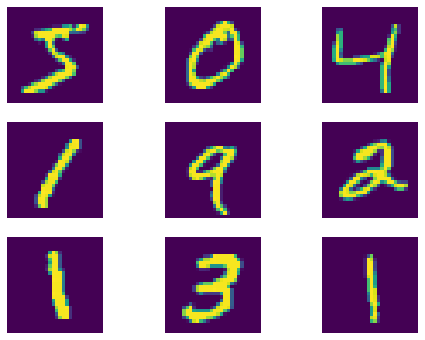

In [87]:
rows, cols = 3, 3
count = 0
fig = plt.figure(figsize=(8, 6))
for row in range(rows):
    for col in range(cols):
        fig.add_subplot(rows, cols, count + 1)
        plt.imshow(X_train[count])
        plt.axis("off")
        count += 1

### Simple Logistic Regression Classifier

In [88]:
X_train_norm, X_test_norm = X_train / 255, X_test / 255 # Normalizing features by dividing by 255. We could also standardize with sklearn StandardScaler
X_train_norm = np.reshape(X_train_norm, (-1, 28*28))
X_test_norm = np.reshape(X_test_norm, (-1, 28*28))
print(X_train_norm.shape, X_test_norm.shape)

(60000, 784) (10000, 784)


In [89]:
def accuracy(y, y_pred):
    return np.mean(y == y_pred)

In [90]:
from sklearn.linear_model import LogisticRegression

num_classes = np.unique(y_train)
start = time.time()
clf = LogisticRegression(C=50. / len(X_train_norm), penalty="l2", tol=0.1)
clf.fit(X_train_norm, y_train)
end = time.time() - start
print(f"It took: {end:.3f}s to train")
y_train_preds = clf.predict(X_train_norm)
print(f"Train acc: {accuracy(y_train, y_train_preds)}")
y_test_preds = clf.predict(X_test_norm)
print(f"Test acc: {accuracy(y_test, y_test_preds):.3f}")


/home/tnguyen2921/miniconda3/envs/enhanceIT/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
It took: 120.371s to train
Train acc: 0.8916166666666666
Test acc: 0.899


## Implementing PCA

### Step 1: standardize the d-dimensional dataset



In [91]:
from sklearn.preprocessing import StandardScaler
# PCA is a linear transformation. Therefore, it is better to transform all features into the same range.
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train.reshape(-1, 28*28))
X_test_std = sc.transform(X_test.reshape(-1, 28*28))

In [92]:
X_train_std[0].reshape((-1, 28, 28)).shape

(1, 28, 28)

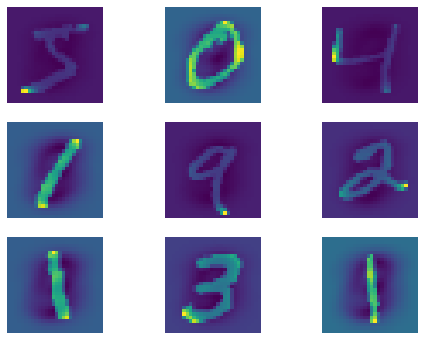

In [93]:
rows, cols = 3, 3
count = 0
fig = plt.figure(figsize=(8, 6))
for row in range(rows):
    for col in range(cols):
        fig.add_subplot(rows, cols, count + 1)
        plt.imshow(X_train_std[count].reshape((28, 28)))
        plt.axis("off")
        count += 1

### Step 2: Construct Covariance Matrix

In [94]:
conv_mat = np.cov(X_train_std.T)


### Step 3: Decompose the covariance matrix into its eigenvectors and eigenvalues

In [95]:
eigen_vals, eigen_vecs = np.linalg.eig(conv_mat)

### Step 4: Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors

In [96]:
eigen_pairs = [(eigen_vals[i], eigen_vecs[i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

### Step 5: Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k <= d).

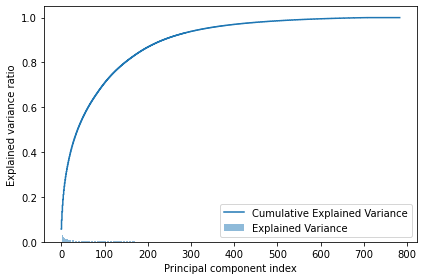

In [97]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var = np.cumsum(var_exp)
xs = range(len(var_exp))
plt.bar(xs, var_exp, alpha=0.5, align="center", label="Explained Variance")
plt.step(xs, cum_var, where="mid", label="Cumulative Explained Variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.tight_layout()


In [98]:
thresh_ind = np.argwhere(cum_var > 0.95)[0][0]
thresh_ind

330

### Step 6: Construct a project matrix, W, from the "top" k eigenvectors



In [99]:
eigen_stacks = [eigen_pairs[i][1][:, np.newaxis] for i in range(thresh_ind)]
w = np.hstack(eigen_stacks)

### Step 7: Transform the d-dimensional input dataset, X, using the projection matrix, W, to obtain the new k-dimensional feature subspace

In [100]:
X_train_pca = X_train_std.dot(w)
X_test_pca = X_test_std.dot(w)

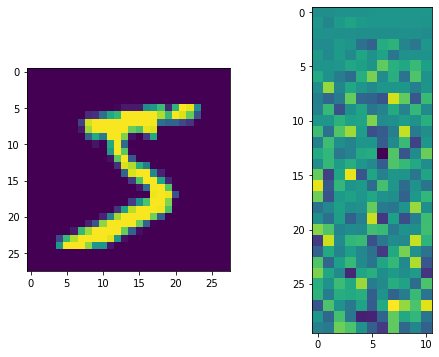

In [102]:
fig = plt.subplots(1, 2, figsize=(8, 6))
imgs = [X_train[0], X_train_pca[0].reshape((30, 11))]
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(imgs[i])

### Retrain Logistic Regression and Naive Bayes classifiers

In [103]:
start = time.time()
lr_clf = LogisticRegression(C=50. / len(X_train), penalty="l2", tol=0.1)
lr_clf.fit(X_train_pca, y_train)
end = time.time() - start
print(f"It took: {end:.3f}s to train")
y_train_preds = lr_clf.predict(X_train_pca)
print(f"Train acc: {accuracy(y_train, y_train_preds):.3f}")
y_test_preds = lr_clf.predict(X_test_pca)
print(f"Test acc: {accuracy(y_test, y_test_preds):.3f}")

It took: 39.049s to train
Train acc: 0.903
Test acc: 0.905


Our logistic regression took significantly less time to train on PCA-transformed data (almost 200% improvement in training time). Despite reducing the number of features from 784 to 330, their performances actually improved a little. In fact, the logistic regression model got 90% accuracy compared to one trained on all features with 89% accuracy

### Plot confusion matrx

Text(0.5, 1.0, 'Confusion matrix')

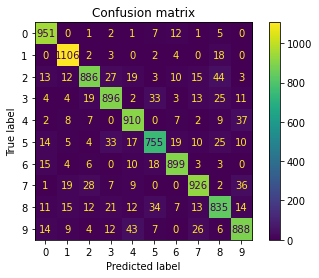

In [104]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr_clf, X_test_pca, y_test)
plt.title("Confusion matrix")

5, 8 seem to be the digits that our model misclassified the most

In [105]:
import scipy.stats as st
def get_bad_preds(number):
    incorrects = (y_test != y_test_preds)
    res = y_test[np.squeeze(np.argwhere(y_test[incorrects] == number))]
    modes = st.mode(res)
    return modes, X_test[y_test == modes[0][0]]
res, arr = get_bad_preds(9)


Text(0.5, 0.98, 'Wrong predictions for digit 9')

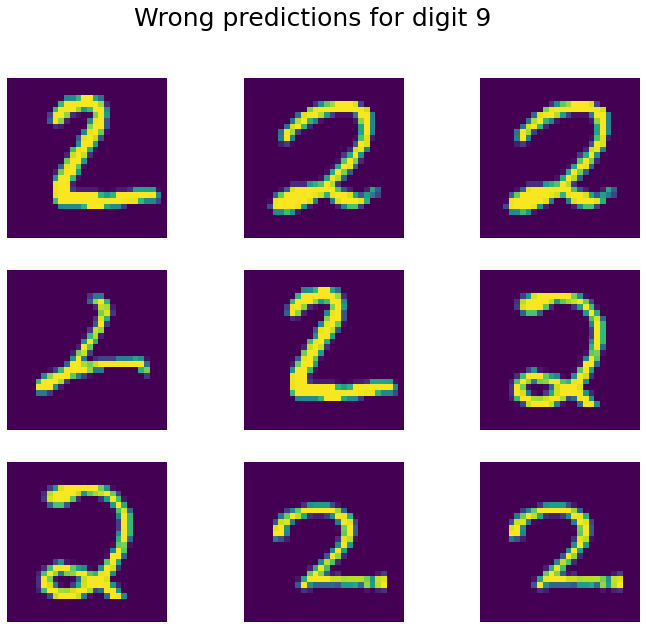

In [106]:
import random
rows, cols = 3, 3
count = 0
random.shuffle(arr)
fig = plt.figure(figsize=(12, 10))
for row in range(rows):
    for col in range(cols):
        fig.add_subplot(rows, cols, count + 1)
        plt.imshow(arr[count].reshape((28, 28)))
        plt.axis("off")
        count += 1
fig.suptitle("Wrong predictions for digit 9", fontsize=25)

Our model misclassifies 5 with 9 most often. These are some images that our model wrongly predicts.

In [107]:
res, arr = get_bad_preds(8)


Text(0.5, 0.98, 'Wrong predictions for digit 8')

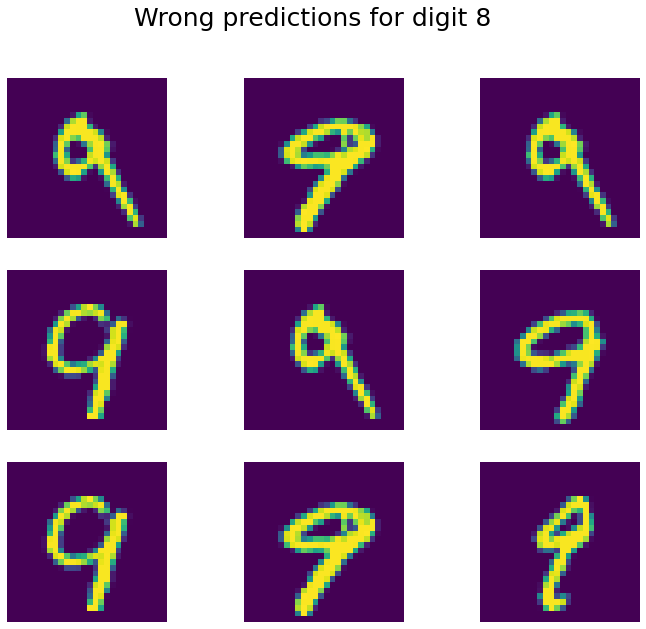

In [108]:
rows, cols = 3, 3
count = 0
random.shuffle(arr)
fig = plt.figure(figsize=(12, 10))
for row in range(rows):
    for col in range(cols):
        fig.add_subplot(rows, cols, count + 1)
        plt.imshow(arr[count].reshape((28, 28)))
        plt.axis("off")
        count += 1
fig.suptitle("Wrong predictions for digit 8", fontsize=25)